# Customer Segmentation using E-com data 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings("ignore")
import os, sys 
os.getcwd()

'C:\\Users\\Packi\\Downloads'

In [2]:
cust_seg = pd.read_csv("E-com_Data.csv")

In [3]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoiceNo          537979 non-null  int64  
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  int64  
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(4), int64(2), object(6)
memory usage: 49.3+ MB


In [4]:
cust_seg.shape

(537979, 12)

In [5]:
cust_seg.isnull().sum()

CustomerID           133790
Item Code                 0
InvoiceNo                 0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [6]:
cust_seg.isnull().sum()/len(cust_seg)*100

CustomerID            24.869000
Item Code              0.000000
InvoiceNo              0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [7]:
# To find out the number of Customers 
cust_seg["CustomerID"].value_counts()

4043.0    7971
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: CustomerID, Length: 4349, dtype: int64

In [8]:
cust_seg['CustomerID'].nunique()

4349

In [9]:
cust_seg.columns

Index(['CustomerID', 'Item Code', 'InvoiceNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [10]:
cust_seg.duplicated().sum()

9

In [11]:
# Remove duplicate data from the actual sheet
cust_seg= cust_seg.drop_duplicates(ignore_index = True)

In [12]:
cust_seg.duplicated().sum()

0

In [13]:
cust_seg

,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,29-10-2017,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,05-10-2017,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,12-10-2017,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,22-08-2017,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10-10-2017,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537965,NaN,85194L,372313,23-03-2017,6,9:27:00 AM,198.0,1188.0,Location 8,NaN,NaN,NaN
537966,NaN,14693,367605,06-02-2017,2,2:25:00 PM,761.0,1522.0,Location 8,NaN,NaN,NaN
537967,NaN,14693,368246,06-02-2017,3,10:40:00 AM,761.0,2283.0,Location 8,NaN,NaN,NaN
537968,NaN,85194L,366891,29-01-2017,15,5:05:00 PM,198.0,2970.0,Location 8,NaN,NaN,NaN


In [14]:
cust_seg= cust_seg.drop(['Quantity', 'Time','Item Code','price per Unit', 'Shipping Location', 'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)

In [15]:
cust_seg

,CustomerID,InvoiceNo,Date of purchase,Price
0,4355.0,398177,29-10-2017,1926.0
1,4352.0,394422,05-10-2017,1740.0
2,4352.0,394422,12-10-2017,1866.0
3,4352.0,388633,22-08-2017,1869.0
4,4352.0,394422,10-10-2017,1888.0
...,...,...,...,...
537965,NaN,372313,23-03-2017,1188.0
537966,NaN,367605,06-02-2017,1522.0
537967,NaN,368246,06-02-2017,2283.0
537968,NaN,366891,29-01-2017,2970.0


In [16]:
cust_seg = cust_seg.rename({'Date of purchase' : 'Date'}, axis=1)

In [17]:
cust_seg.head(10)

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177,29-10-2017,1926.0
1,4352.0,394422,05-10-2017,1740.0
2,4352.0,394422,12-10-2017,1866.0
3,4352.0,388633,22-08-2017,1869.0
4,4352.0,394422,10-10-2017,1888.0
5,4349.0,397122,27-10-2017,256.0
6,4343.0,368432,13-02-2017,-3688.0
7,4341.0,377109,14-05-2017,2031.0
8,4341.0,377109,12-05-2017,2076.0
9,4341.0,390217,07-09-2017,4020.0


In [18]:
cust_seg['CustomerID'].isnull().sum()

133789

In [19]:
# Dropping Customer ID with null values 
cust_seg =cust_seg.dropna(subset=['CustomerID'])
cust_seg.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [20]:
cust_seg['Date1'] = cust_seg['Date']
cust_seg

,CustomerID,InvoiceNo,Date,Price,Date1
0,4355.0,398177,29-10-2017,1926.0,29-10-2017
1,4352.0,394422,05-10-2017,1740.0,05-10-2017
2,4352.0,394422,12-10-2017,1866.0,12-10-2017
3,4352.0,388633,22-08-2017,1869.0,22-08-2017
4,4352.0,394422,10-10-2017,1888.0,10-10-2017
...,...,...,...,...,...
537936,37.0,402292,28-11-2017,384.0,28-11-2017
537937,37.0,402292,27-11-2017,398.0,27-11-2017
537938,21.0,363890,21-12-2016,2464.0,21-12-2016
537939,21.0,363890,21-12-2016,4068.0,21-12-2016


In [21]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  404181 non-null  float64
 1   InvoiceNo   404181 non-null  int64  
 2   Date        404181 non-null  object 
 3   Price       404181 non-null  float64
 4   Date1       404181 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 18.5+ MB


In [22]:
cust_seg['Date'] = pd.to_datetime(cust_seg['Date'])
cust_seg['Date1'] = pd.to_datetime(cust_seg['Date1'])

In [23]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  404181 non-null  float64       
 1   InvoiceNo   404181 non-null  int64         
 2   Date        404181 non-null  datetime64[ns]
 3   Price       404181 non-null  float64       
 4   Date1       404181 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 18.5 MB


In [24]:
cust_seg

,CustomerID,InvoiceNo,Date,Price,Date1
0,4355.0,398177,2017-10-29,1926.0,2017-10-29
1,4352.0,394422,2017-05-10,1740.0,2017-05-10
2,4352.0,394422,2017-12-10,1866.0,2017-12-10
3,4352.0,388633,2017-08-22,1869.0,2017-08-22
4,4352.0,394422,2017-10-10,1888.0,2017-10-10
...,...,...,...,...,...
537936,37.0,402292,2017-11-28,384.0,2017-11-28
537937,37.0,402292,2017-11-27,398.0,2017-11-27
537938,21.0,363890,2016-12-21,2464.0,2016-12-21
537939,21.0,363890,2016-12-21,4068.0,2016-12-21


In [25]:
cust_seg['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [26]:
New_date  = datetime.datetime(2017,12,20)

In [27]:
RFMScore = cust_seg.groupby('CustomerID').agg({'Date': lambda x: (New_date - x.max()).days, 
                                              'Date1': lambda x: x.count(),
                                              'Price': lambda x: x.sum()})
RFMScore['Date1'] = RFMScore['Date1'].astype(int)
RFMScore.columns

Index(['Date', 'Date1', 'Price'], dtype='object')

In [28]:
RFMScore.rename(columns= {'Date' : 'Recency', 'Date1' : 'Frequency', 'Price' : 'Monetory'}, inplace=True)

In [29]:
RFMScore

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,13,24962.0


In [30]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,754,280608.0


In [31]:
RFMScore.describe()

,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4.349000e+03
mean,61.445160,92.936537,2.299380e+05
std,89.656941,232.086935,8.572589e+05
min,1.000000,1.000000,-5.037200e+04
25%,10.000000,17.000000,3.814800e+04
50%,19.000000,42.000000,8.365500e+04
75%,73.000000,101.000000,2.056120e+05
max,617.000000,7970.000000,3.553619e+07


In [32]:
# Split into four segment to identify customer details basis quantile method
quantiles = RFMScore.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [33]:
def RScore(x, p, d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [34]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [35]:
RFMScore['R'] = RFMScore['Recency'].apply(RScore, args=("Recency", quantiles))
RFMScore['F'] = RFMScore['Frequency'].apply(FnMScore, args=("Frequency", quantiles))
RFMScore['M'] = RFMScore['Monetory'].apply(FnMScore, args=("Monetory", quantiles))

In [36]:
RFMScore

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,12,13,24962.0,2,4,4


In [37]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [38]:
RFMScore['RFMGroup'] = RFMScore.R.map(str) + RFMScore.F.map(str) +  RFMScore.M.map(str)
RFMScore['RFMScore'] = RFMScore[['R', 'F', 'M']].sum(axis=1) 
RFMScore.head(10)

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,111,3
3.0,77,27,257404.0,4,3,1,431,8
4.0,20,72,176613.0,3,2,2,322,7
5.0,18,16,41976.0,2,4,3,243,9
6.0,9,84,151822.0,1,2,2,122,5
7.0,208,4,9410.0,4,4,4,444,12
8.0,234,58,135550.0,4,2,2,422,8
9.0,15,13,65832.0,2,4,3,243,9
10.0,16,58,331601.0,2,2,1,221,5


In [42]:
# Categorize the customer basis RFM Points
Loyality_Level = ['Prime', 'Diamond','Platinum','Gold']
score_cuts = pd.qcut(RFMScore.RFMScore, q=4, labels=Loyality_Level)
RFMScore['Loyality_Level'] = score_cuts.values
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,111,3,Prime
1,3.0,77,27,257404.0,4,3,1,431,8,Diamond
2,4.0,20,72,176613.0,3,2,2,322,7,Diamond
3,5.0,18,16,41976.0,2,4,3,243,9,Platinum
4,6.0,9,84,151822.0,1,2,2,122,5,Prime
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Platinum
4345,4369.0,181,7,10774.0,4,4,4,444,12,Gold
4346,4370.0,12,13,24962.0,2,4,4,244,10,Platinum
4347,4371.0,4,754,280608.0,1,1,1,111,3,Prime


In [43]:
RFMScore.to_csv("customer_segmentation.csv")

In [44]:
# Create a New Dataset for Modelling 

RFMScore1 = RFMScore.iloc[:,1:4]
RFMScore1.head()

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


In [45]:
# Feateure Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFMScore1)
scaled_data

array([[-0.64079551,  0.38379456,  0.3777193 ],
       [ 0.17351282, -0.28413542,  0.03204302],
       [-0.46231697, -0.09022026, -0.06221123],
       ...,
       [-0.55155624, -0.34446458, -0.23913379],
       [-0.64079551,  2.84867167,  0.0591138 ],
       [-0.1165148 , -0.09883872,  0.03836156]])

In [46]:
scaled_data = pd.DataFrame(scaled_data, index=RFMScore1.index, columns=RFMScore1.columns)

In [47]:
scaled_data

,Recency,Frequency,Monetory
0,-0.640796,0.383795,0.377719
1,0.173513,-0.284135,0.032043
2,-0.462317,-0.090220,-0.062211
3,-0.484627,-0.331537,-0.219285
4,-0.585021,-0.038510,-0.091133
...,...,...,...
4344,-0.495782,-0.357392,-0.244363
4345,1.333623,-0.370320,-0.255686
4346,-0.551556,-0.344465,-0.239134
4347,-0.640796,2.848672,0.059114


# K-Means Cluster 

In [48]:
from sklearn.cluster import KMeans

In [49]:
wcss = []

for i in range(2,15):
    km = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=101 )
    km.fit(scaled_data)
    wcss.append(km.inertia_)

In [50]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]

<AxesSubplot:>

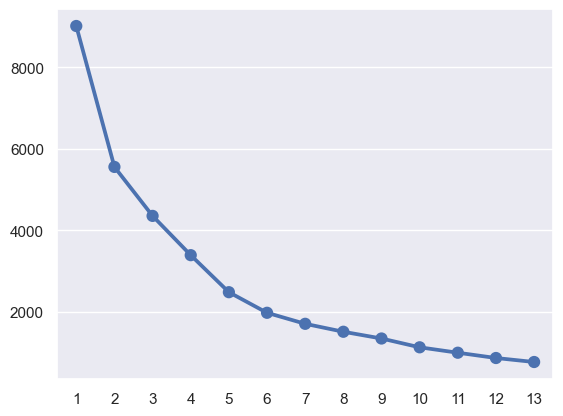

In [51]:
sns.pointplot(abc, wcss)

In [52]:
km = KMeans(n_clusters=5, init='k-means++',max_iter=1000, random_state=101 )
y_kmeans = km.fit_predict(scaled_data)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
RFMScore['Cluster'] = km.labels_

In [54]:
RFMScore.tail(20)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,Loyality_Level,Cluster
4329,4353.0,25,42,274078.0,3,3,1,331,7,Diamond,0
4330,4354.0,49,140,328510.0,3,1,1,311,5,Prime,0
4331,4355.0,50,21,39209.0,3,3,3,333,9,Platinum,0
4332,4356.0,142,13,21484.0,4,4,4,444,12,Gold,1
4333,4357.0,13,62,199329.0,2,2,2,222,6,Diamond,0
4334,4358.0,13,46,97001.0,2,2,2,222,6,Diamond,0
4335,4359.0,226,2,96.0,4,4,4,444,12,Gold,1
4336,4360.0,366,8,18444.0,4,4,4,444,12,Gold,1
4337,4361.0,39,12,29440.0,3,4,4,344,11,Gold,0
4338,4362.0,3,170,413270.0,1,1,1,111,3,Prime,0


In [56]:
RFMScore.to_csv("kmeans_cluseter.csv")

In [57]:
# Define customer details basis Loyality_Level

final_details = RFMScore.groupby('Loyality_Level')[['Recency','Frequency', 'Monetory','CustomerID']].agg({
    'Recency':'mean', 'Frequency' : 'mean', 'Monetory': 'mean', 'CustomerID':'nunique'
    
}).reset_index()

In [58]:
final_details

,Loyality_Level,Recency,Frequency,Monetory,CustomerID
0,Prime,10.200000,227.785496,585979.422137,1310
1,Diamond,32.593629,57.475524,124481.796426,1287
2,Platinum,84.019169,25.174654,56236.376038,939
3,Gold,163.617466,10.051661,23804.766298,813


In [59]:
RFMScore1['Cluster'] = km.labels_

In [60]:
RFMScore1.to_csv("kmeans_cluseter1.csv")